In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as plticker
from sklearn.utils import shuffle
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline

In [2]:
brsf = pd.read_csv("BRS_final.csv")
brsf.Date = pd.to_datetime(brsf.Date)
brsf.set_index("Date",inplace=True)

In [3]:
#x1 and x2 are the first and second night for the sensor data respectively. Same applies for y1 and y2 but instead for motion.
x1 = brsf[["OPT_2","BAS_3","STRUC_S","PIER_N","AMBIENT"]].loc["2017-04-04 19:27:00":"2017-04-05 6:45:00"]
x2 = brsf[["OPT_2","BAS_3","STRUC_S","PIER_N","AMBIENT"]].loc["2017-04-05 19:28:00":"2017-04-06 6:43:00"]
X = pd.concat([x1,x2])
y1 = brsf[['X movement','Y movement']].loc["2017-04-04 19:27:00":"2017-04-05 6:45:00"]
y2 = brsf[['X movement','Y movement']].loc["2017-04-05 19:28:00":"2017-04-06 6:43:00"]
Y = pd.concat([y1,y2])

In [4]:
#X_test is the night of data we want to predict(3rd night). y_test is the actual x and y motion.
X_train = X
X_test = brsf[["OPT_2","BAS_3","STRUC_S","PIER_N","AMBIENT"]].loc["2017-04-06 19:29:00":"2017-04-07 6:42:00"]
y_train = Y
y_test = brsf[['X movement','Y movement']].loc["2017-04-06 19:29:00":"2017-04-07 6:42:00"]

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
#predicted values
predicted = lr.predict(X_test)

C:\Users\Usama Zulfiqar\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



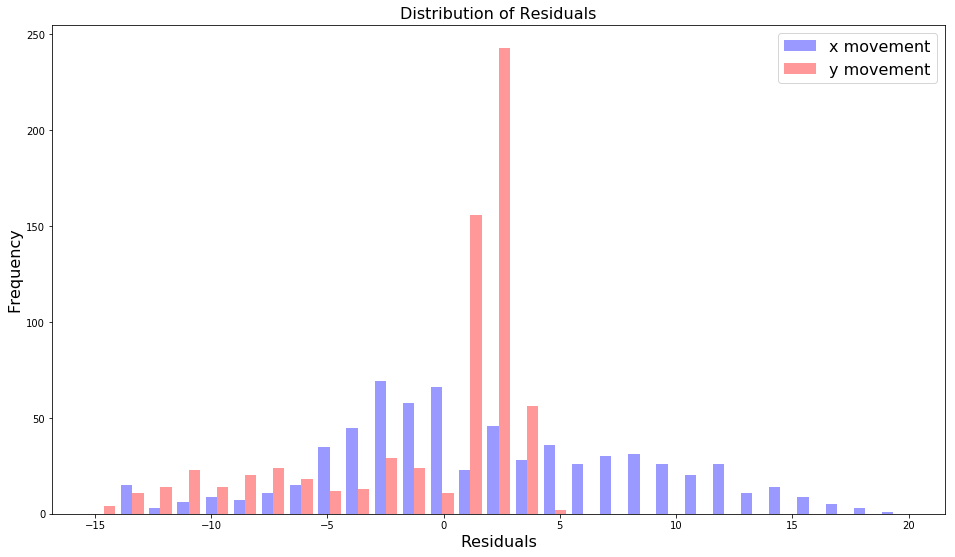

In [11]:
#Distribution of residuals between actual values of movement and predicted values.
plt.figure(figsize=(16,9))
font = {"size":16}
sns.distplot((y_test.values - predicted),color=["b","r"],kde=False)
plt.legend(["x movement","y movement"],prop={"size": 16})
plt.xlabel("Residuals",fontdict=font)
plt.ylabel("Frequency",fontdict=font)
plt.title("Distribution of Residuals",fontdict=font)
plt.savefig("Distribution of Residuals(6-7 prediction).png")

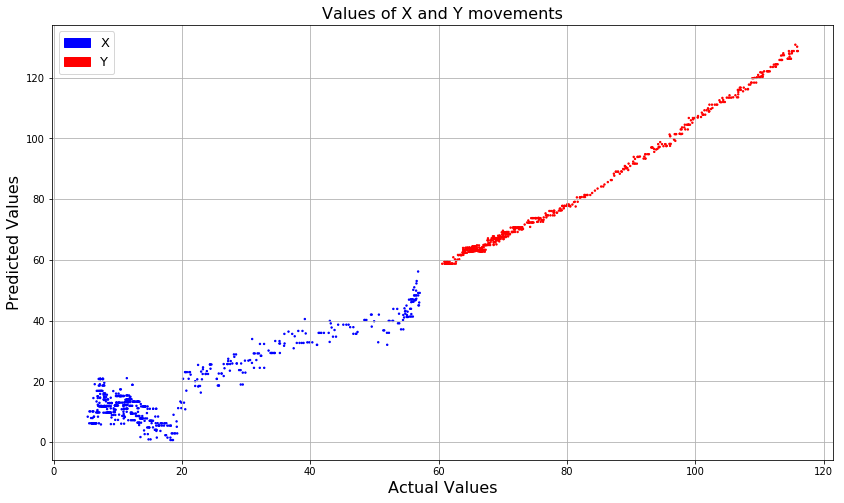

In [12]:
#Plot of predicted value against actual values.
plt.figure(figsize=(14,8))
plt.scatter(y_test,predicted,2,c=["b","r"])
x_legend = mpatches.Patch(color="blue",label="X")
y_legend = mpatches.Patch(color="red",label="Y")
font = {"size":16}
plt.xlabel("Actual Values",fontdict=font)
plt.ylabel("Predicted Values",fontdict=font)
plt.legend(handles=[x_legend,y_legend],prop={"size":13})
plt.title("Values of X and Y movements",fontdict=font)
plt.grid()
plt.savefig("Values of X and Y movements(6-7 prediction).png")

In [13]:
#Predicted movement and actual movement over time graph.
time = pd.date_range("2017-04-06 19:29:00","2017-04-07 6:42:00",freq="min")
y_test['X predicted']=predicted[:,0]
y_test['Y predicted']=predicted[:,1]

def listPlot(y):
    traces=[]
    for i in range(len(y.columns)):
        trace = go.Scatter(x=time, y=y.iloc[:,i], name= y.columns[i] ,showlegend=True)
        traces.append(trace)
    return traces

def Layout(title,yaxis,xaxis):    
    layout = go.Layout(
        hovermode='closest',
        title=title,
        showlegend=True,
        legend= dict(x=1.1),
        autosize=False,
        width=900,
        height=600,
        yaxis=dict(title=yaxis),
        xaxis=dict(title=xaxis)
    )
    return layout



figPre = go.Figure(data=listPlot(y_test), layout=Layout('Predicted movment vs actual movement (April 6-7)',"Differential motion (microns)","Date"))

py.plot(figPre,filename="Predicted movment vs actual movement(April 6-7).html")

'file://C:\\Users\\Usama Zulfiqar\\Documents\\Cambridge project\\Jupyter Notebooks and Data\\Predicted movment vs actual movement(April 6-7).html'

In [14]:
#Residuals versus time plot.
residuals=pd.DataFrame()
residuals['X']=y_test['X movement']-y_test['X predicted']
residuals['Y']=y_test['Y movement']-y_test['Y predicted']

figRes = go.Figure(data=listPlot(residuals), layout=Layout('Residuals versus Time','Residuals (microns)','Date'))

py.plot(figRes,filename="Residuals versus Time.html")

'file://C:\\Users\\Usama Zulfiqar\\Documents\\Cambridge project\\Jupyter Notebooks and Data\\Residuals versus Time.html'

In [15]:
#sorting coefficients to be written to a csv file.
mlr = pd.DataFrame(data=lr.coef_.transpose(),index=X.columns,columns=["X Coefficient","Y Cofficient"])

In [16]:
mlr.to_csv("Multiple Linear Regression Coefficients(6-7 prediction).csv")